<a href="https://colab.research.google.com/github/JUSTYNAYANG/Python/blob/main/20220622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepFace & Gradio Usage

* deepface: https://github.com/serengil/deepface
* gradio: https://gradio.app/getting_started/

In [7]:
!pip install deepface
#the "!" is not mandatory, the system still knows that we are trying to install code from outside (it is just a good habit to maintain)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from deepface import DeepFace
#this code helps analyze the photo and determine information from it 

In [13]:
obj = DeepFace.analyze(img_path = "images.jpg", actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]


In [14]:
obj

{'age': 30,
 'dominant_emotion': 'happy',
 'dominant_race': 'asian',
 'emotion': {'angry': 1.4202411691144334e-06,
  'disgust': 1.1891050210460774e-10,
  'fear': 3.74050266316317e-06,
  'happy': 97.44835495948792,
  'neutral': 2.551504969596863,
  'sad': 3.167747877341753e-05,
  'surprise': 0.00011004926818714011},
 'gender': 'Woman',
 'race': {'asian': 86.69199268174128,
  'black': 0.43023091511314604,
  'indian': 1.2811151165434786,
  'latino hispanic': 10.757961765406238,
  'middle eastern': 0.1233395378978275,
  'white': 0.7153640927591379},
 'region': {'h': 68, 'w': 68, 'x': 105, 'y': 31}}

In [26]:
from PIL import Image
#this is just to show the image

In [19]:
im = Image.open("images.jpg")

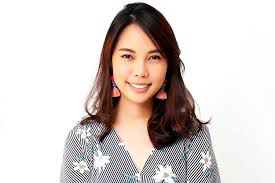

In [20]:
im

In [27]:
!pip install gradio
#this can help us make an app to run the deepface code

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import gradio as gr

def analyze(image):
    return DeepFace.analyze(image, actions = ['age', 'gender', 'race', 'emotion'])

demo = gr.Interface(fn=analyze, inputs="text", outputs="text")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24896.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2e69eefc90>,
 'http://127.0.0.1:7861/',
 'https://24896.gradio.app')

##example

In [91]:
from PIL import Image
import numpy as np

def rearrangeRGB(image):
  im = Image.fromarray(image)
  r, g, b = im.split()
  new_im = Image.merge("RGB",[b, g, r])
  # new_im = im.transpose(Image.FLIP_LEFT_RIGHT)
  return np.array(new_im)

demo = gr.Interface(fn=rearrangeRGB, 
                    inputs="image", 
                    outputs="image", 
                    title="轉換色層",
                    description="請選擇圖片，點擊 submit！")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://36924.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2e2c8c6ed0>,
 'http://127.0.0.1:7897/',
 'https://36924.gradio.app')

In [105]:
a = {'cat':"貓咪", 'dog':'狗狗'}

def lookup(word):
  meaning = f"{word} 的意識是{a[word]}"

  return meaning

demo = gr.Interface(fn=lookup, 
                    inputs="text", 
                    outputs="text", 
                    title="字典查詢",
                    description="請輸入欲查詢單字，點擊 submit！")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55546.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2e0664c790>,
 'http://127.0.0.1:7909/',
 'https://55546.gradio.app')

#Homework
* version 1

##version 1

In [55]:
import gradio as gr

def analyze(image):
    obj = DeepFace.analyze(image, actions = ['age', 'gender', 'race', 'emotion'])
    obj_information = "The picture shows a " + obj["gender"] + " that is around " + str(obj["age"]) +" years old." + " This person's race is " + obj["dominant_race"] + ".  "+ " This person is wearing a " + obj["dominant_emotion"] +" expression."
    return obj_information

demo = gr.Interface(fn=analyze, inputs="image", outputs="text")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55635.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2e49f12ed0>,
 'http://127.0.0.1:7886/',
 'https://55635.gradio.app')

##version 2


In [82]:
# this version uses f string
# this version is made to give the user a feeling that one is searching for information on top secret files

In [92]:
import gradio as gr

def analyze(image):
    obj = DeepFace.analyze(image, actions = ['age', 'gender', 'race', 'emotion'])
    new_line = "\n"
    return f"INFORMATION GRANTED: {new_line} {new_line} GENDER: {obj['gender']} {new_line} AGE: {obj['age']} {new_line} RACE: {obj['dominant_race']}"

demo = gr.Interface(fn=analyze, inputs="image", outputs="text", title="info",
                    description="image")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://31316.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2e2c5a4ad0>,
 'http://127.0.0.1:7898/',
 'https://31316.gradio.app')

#Practicing the Basics

##dict (dictionary)

In [56]:
a = {}

In [58]:
a['cat'] = '貓咪'
a['dog'] = '狗狗'

In [59]:
a

{'cat': '貓咪', 'dog': '狗狗'}

In [60]:
a['cat']

'貓咪'

In [61]:
'cat' + "的中文意思是" + a['cat']

'cat的中文意思是貓咪'

In [62]:
for x in a:
  print(x)

cat
dog


In [63]:
for x in a:
  print(x + "的中文意思是" + a[x])

cat的中文意思是貓咪
dog的中文意思是狗狗


In [65]:
for x in a:
  print(f"{x}的中文意思是{a[x]}")
# this is usuable for the newer version of python
# f string
# by putting {}, the system changes the variable into whatever is placed in it automatically

cat的中文意思是貓咪
dog的中文意思是狗狗


##functions

In [86]:
for i in range(5):
  print((5-i)* " " + (2*i+1) * "*")

     *
    ***
   *****
  *******
 *********


In [89]:
def pyramid(h):
  for i in range(h):
    print((h-i)* " " + (2*i+1) * "*")


In [90]:
pyramid(10)

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************
 *******************
